In [1]:
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd
import seaborn as sns

1\. **Kernel Density Estimate**

Produce a KDE for a given distribution (by hand, not using seaborn!):

* Fill a numpy array, x,  of len(N) (with N=O(100)) with a variable normally distributed, with a given mean a standard deviation
* Fill an histogram in pyplot taking properly care about the aesthetic
   * use a meaningful number of bins
   * set a proper y axis label
   * set proper value of y axis major ticks labels (e.g. you want to display only integer labels)
   * display the histograms as data points with errors (the error being the poisson uncertainty)
* for every element of x, create a gaussian with the mean corresponding the element value and std as a parameter that can be tuned. The std default value should be:
$$ 1.06 * x.std() * x.size ^{-\frac{1}{5.}} $$
you can use the scipy function `stats.norm()` for that.
* In a separate plot (to be placed beside the original histogram), plot all the gaussian functions so obtained
* Sum (with np.sum()) all the gaussian functions and normalize the result such that the integral matches the integral of the original histogram. For that you could use the `scipy.integrate.trapz()` method


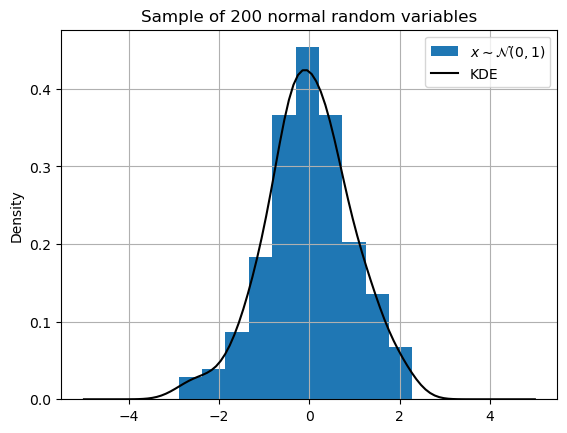

In [2]:
X = np.random.randn(200)
x = np.linspace(-5,5,100)
std = 1.06*np.std(X)*len(X)**(-1/5)
KDE = np.array([np.exp(-(x0-x)**2/(2*std**2))/np.sqrt(2*np.pi*std**2) for x0 in X]).sum(axis=0)

plt.hist(X, density=True, label="$x\\sim\\mathcal{N}(0,1)$")
plt.plot(x,KDE/len(X), label="KDE", color='k')
plt.grid()
plt.ylabel("Density")
plt.title(f"Sample of {len(X)} normal random variables")
plt.legend()
plt.show()

2\. **Color-coded scatter plot**

Produce a scatter plot out of a dataset with two categories

* Write a function that generate a 2D datasets of 2 categories. Each category should distribute as a 2D gaussian with a given mean and std (clearly it is better to have different values means..)
* Display the dataset in a scatter plot marking the two categories with different marker colors.

An example is given below

You can try to make the procedure more general by allowing a given number $n\ge 2$ of categories

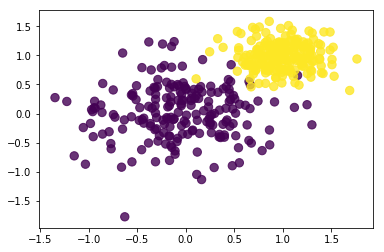

In [3]:
#! wget https://www.dropbox.com/s/u4y3k4kk5tc7j46/two_categories_scatter_plot.png
from IPython.display import Image
Image('two_categories_scatter_plot.png')

<>:2: SyntaxWarning: invalid escape sequence '\s'
<>:2: SyntaxWarning: invalid escape sequence '\s'
/tmp/ipykernel_22671/181185593.py:2: SyntaxWarning: invalid escape sequence '\s'
  ''' 2D Scatter plot of a given number of categories. N is the (gaussian)


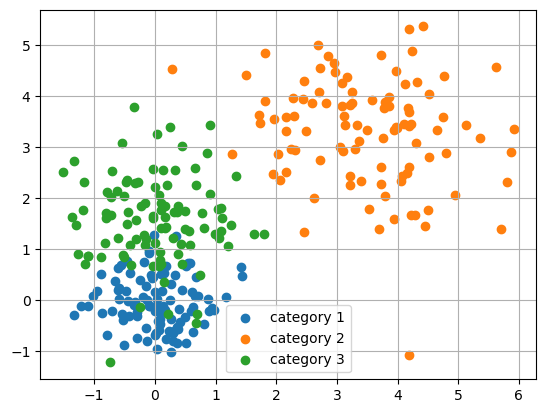

In [4]:
def plot_categories(N, categories, means, variances):
    ''' 2D Scatter plot of a given number of categories. N is the (gaussian)
        sample size, means is a tuple of pair of means (mu_x, mu_y)_i and
        variances is a tuple of the variances \sigma_i
    '''
    x = np.random.randn(categories, N)
    y = np.random.randn(categories, N)
    for i in range(categories):
        x[i] += means[i][0]
        y[i] += means[i][1]
        x[i] *= variances[i]
        y[i] *= variances[i]
        plt.scatter(x[i], y[i], label=f"category {i+1}")
    plt.legend()
    plt.grid()
    plt.show()

plot_categories(100, 3, ((0,0), (3,3), (0,2)), (0.5, 1.1, 0.8))

3\. **Profile plot**

Produce a profile plot from a scatter plot.
* Download the following dataset and load it as a pandas dataframe:
```bash
wget https://www.dropbox.com/s/hgnvyj9abatk8g6/residuals_261.npy
```
Note that you should use the `np.load()` function to load the file as a numpy array, call the `.item()` method, and then pass it to the `pd.DataFrame()` constructor.
* Inspect the dataset, you'll find two variables (features)
* Clean the sample by selecting the entries (rows) with the variable "residual" in absolute value smaller than 2
* perform a linear regression of "residuals" versus "distances" using `scipy.stats.linregress()` 
* plot a seaborn jointplot of  "residuals" versus "distances", having seaborn performing a linear regression. The result of the regression should be displayed on the plot
* Fill 3 numpy arrays
  * x, serving as an array of bin centers for the "distance" variable. It should range from 0 to 20 with reasonable number of steps (bins)
  * y, the mean values of the "residuals", estimated in slices (bins) of "distance"
  * erry, the standard deviation of the  of the "residuals", estimated in slices (bins) of "distance"
* Plot the profile plot on top of the scatter plot

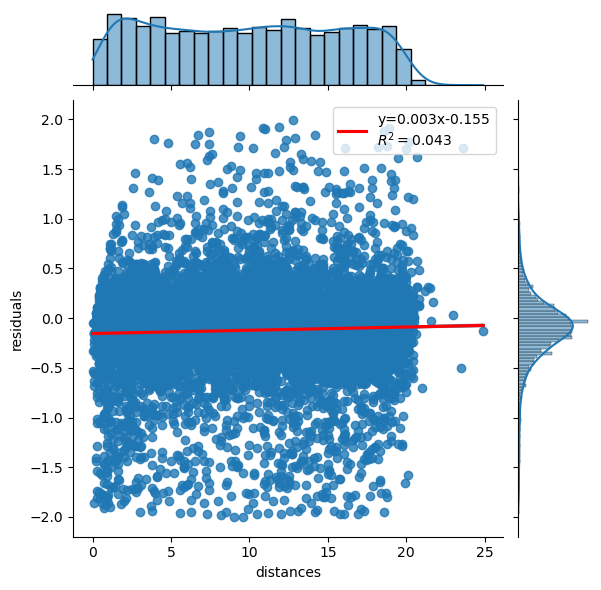

In [5]:
# ! wget https://www.dropbox.com/s/hgnvyj9abatk8g6/residuals_261.npy

from scipy.stats import linregress

df = pd.DataFrame(np.load("residuals_261.npy", allow_pickle=True).item())
data = df[df["residuals"].abs() <= 2]
fit = linregress(data["distances"], data["residuals"])
plot = sns.jointplot(data, x="distances", y="residuals", kind="reg")
sns.regplot(data, x="distances", y="residuals", color='r', scatter=False, label=f"y={fit.slope:.3f}x{fit.intercept:+.3f}\n$R^2=${fit.rvalue:.3f}")
plot.ax_joint.legend()

In [11]:
data['distances'].sort_values()
#for i in range(len(x)-1):
#    print(data[data['distances'] <= x[i+1] and data['distances'] >= x[i]].mean())

1874      0.0
6200      0.0
8612      0.0
9370      0.1
400       0.1
         ... 
766      21.7
9636     23.0
10816    23.5
1099     23.6
10545    24.9
Name: distances, Length: 10490, dtype: float64